Masukkan koordinat titik segitiga (format: x,y):


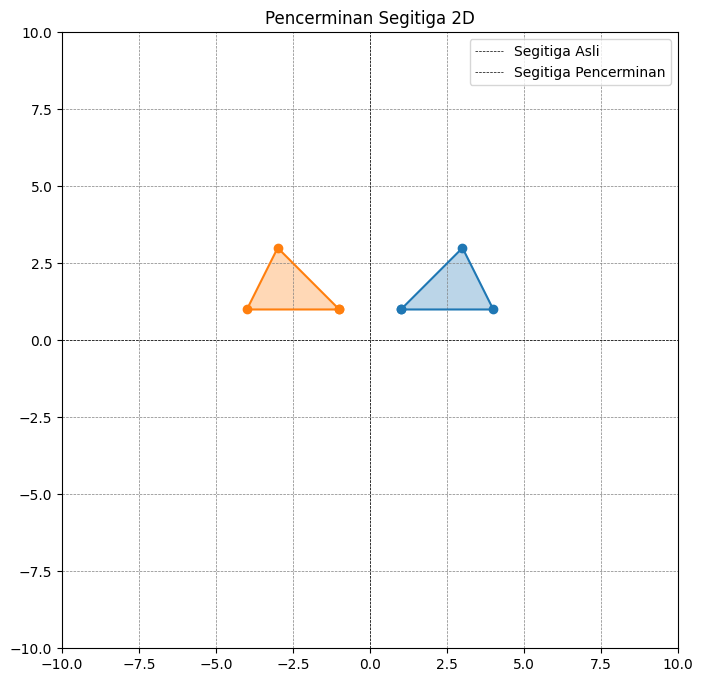

In [3]:
import matplotlib.pyplot as plt

# Fungsi untuk menggambar segitiga
def gambar_segitiga(titik):
    # Menyusun titik segitiga
    x = [titik[0][0], titik[1][0], titik[2][0], titik[0][0]]
    y = [titik[0][1], titik[1][1], titik[2][1], titik[0][1]]

    # Menggambar segitiga
    plt.plot(x, y, marker='o')
    plt.fill(x, y, alpha=0.3) # Mengisi segitiga dengan warna transparan

# Fungsi untuk melakukan pencerminan
def pencerminan(titik, sumbu):
    # Melakukan pencerminan berdasarkan sumbu
    if sumbu == 'x':
        # Pencerminan terhadap sumbu x
        return [[x, -y] for (x, y) in titik]
    elif sumbu == 'y':
        # Pencerminan terhadap sumbu y
        return [[-x, y] for (x, y) in titik]
    elif sumbu == 'origin':
        # Pencerminan terhadap origin
        return [[-x, -y] for (x, y) in titik]
    else:
        raise ValueError("Sumbu tidak valid. Pilih 'x', 'y', atau 'origin'.")

# Input titik segitiga
titik_segitiga = []
print("Masukkan koordinat titik segitiga (format: x,y):")
for i in range(1, 4):
    koordinat = input(f"Titik {i}: ")
    x, y = map(float, koordinat.split(','))
    titik_segitiga.append((x, y))

# Input jenis sumbu pencerminan
sumbu = input("Masukkan sumbu pencerminan ('x', 'y', atau 'origin'): ")

# Menggambar segitiga asli
plt.figure(figsize=(8, 8))
plt.title('Pencerminan Segitiga 2D')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Gambar segitiga asli
gambar_segitiga(titik_segitiga)

# Pencerminan segitiga
titik_segitiga_pencerminan = pencerminan(titik_segitiga, sumbu)

# Menggambar segitiga setelah pencerminan
gambar_segitiga(titik_segitiga_pencerminan)

# Menambahkan legend dan menampilkan plot
plt.legend(['Segitiga Asli', 'Segitiga Pencerminan'])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
# Amati hasilnya

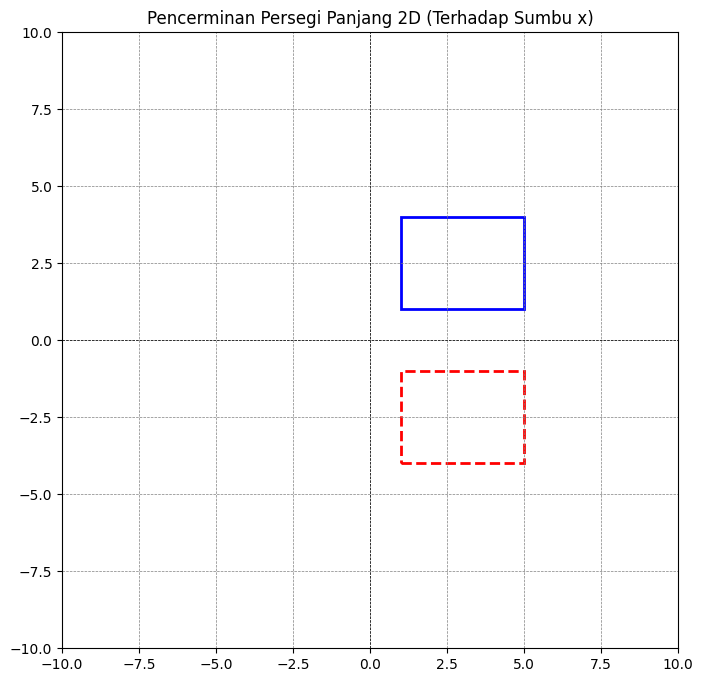

In [7]:
# Praktikum 2

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Fungsi untuk menggambar persegi panjang
def gambar_persegi_panjang(ax, x, y, lebar, tinggi, label='Persegi Panjang', 
    fill=True, edgecolor='blue', linewidth=2, linestyle='-'):
    
    # Membuat objek persegi panjang
    persegi_panjang = patches.Rectangle(
        (x, y), lebar, tinggi, 
        edgecolor=edgecolor, facecolor='none', 
        fill=fill, linewidth=linewidth, linestyle=linestyle
    )
    
    # Menambahkan persegi panjang ke axes
    ax.add_patch(persegi_panjang) 

# Fungsi untuk melakukan pencerminan persegi panjang
def pencerminan_persegi_panjang(x, y, lebar, tinggi, sumbu):
    # Pencerminan terhadap sumbu X
    if sumbu == 'x':
        # Koordinat baru: x tetap, y baru = y lama - tinggi. Tinggi tetap, Lebar tetap.
        # Catatan: Pencerminan sumbu X membalik posisi y dan y+tinggi
        return x, -(y + tinggi), lebar, tinggi
    
    # Pencerminan terhadap sumbu Y
    elif sumbu == 'y':
        # Koordinat baru: x baru = x lama - lebar. Lebar tetap, y tetap, tinggi tetap.
        # Catatan: Pencerminan sumbu Y membalik posisi x dan x+lebar
        return -(x + lebar), y, lebar, tinggi
    
    # Pencerminan terhadap origin
    elif sumbu == 'origin':
        # Menggabungkan efek pencerminan X dan Y
        return -(x + lebar), -(y + tinggi), lebar, tinggi
    
    # Input sumbu tidak valid
    return -x, -y, lebar, tinggi # Kasus default atau error, mungkin bukan yang dimaksud di kode asli

x = float(input("Masukkan koordinat X sudut kiri bawah: "))
y = float(input("Masukkan koordinat Y sudut kiri bawah: "))
lebar = float(input("Masukkan lebar persegi panjang: "))
tinggi = float(input("Masukkan tinggi persegi panjang: "))
sumbu = input("Pilih sumbu pencerminan (x, y, atau origin): ").strip().lower()

# --- Membuat plot ---
fig, ax = plt.subplots(figsize=(8, 8))

# --- Menggambar persegi panjang asli ---
gambar_persegi_panjang(ax, x, y, lebar, tinggi, label='Persegi Panjang Asli', edgecolor='blue', linestyle='-')

# --- Menghitung dan Menggambar persegi panjang setelah pencerminan ---
x_baru, y_baru, lebar_baru, tinggi_baru = pencerminan_persegi_panjang(x, y, lebar, tinggi, sumbu)

gambar_persegi_panjang(
    ax, x_baru, y_baru, lebar_baru, tinggi_baru, 
    label=f'Persegi Panjang Setelah Pencerminan ({sumbu})', 
    edgecolor='red', linestyle='--'
    )

# Mengatur batas sumbu X dan Y
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal', adjustable='box')
ax.axhline(0, color='black', linewidth=0.5, ls='--') # Sumbu X
ax.axvline(0, color='black', linewidth=0.5, ls='--') # Sumbu Y
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title(f'Pencerminan Persegi Panjang 2D (Terhadap Sumbu {sumbu})')
plt.show()

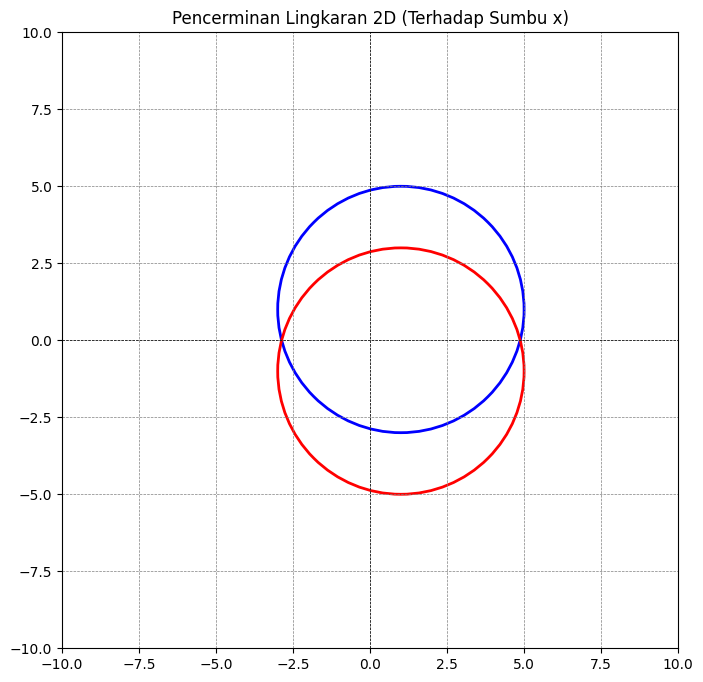

In [3]:
# Praktikum 3

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Fungsi untuk menggambar lingkaran
def gambar_lingkaran(ax, x, y, radius, label='Lingkaran', fill=False, edgecolor='blue', linewidth=2):
    # Membuat objek lingkaran
    lingkaran = patches.Circle(
        (x, y), radius, 
        fill=fill, edgecolor=edgecolor, 
        linewidth=linewidth)
    
    # Menambahkan lingkaran ke axes
    ax.add_patch(lingkaran)

# Fungsi untuk mencerminkan lingkaran
def pencerminan_lingkaran(x, y, radius, sumbu):
    
    # Pencerminan terhadap sumbu X
    if sumbu == 'x':
        # x tetap, y menjadi -y
        return x, -y, radius
    
    # Pencerminan terhadap sumbu Y
    elif sumbu == 'y':
        # x menjadi -x, y tetap
        return -x, y, radius
    
    # Pencerminan terhadap Origin
    elif sumbu == 'origin':
        # x menjadi -x, y menjadi -y
        return -x, -y, radius
    
    # Sumbu tidak valid
    else:
        raise ValueError("Sumbu tidak valid. Pilih 'X', 'Y', atau 'Origin'.")

# --- Input dari pengguna ---
try:
    x = float(input("Masukkan koordinat X pusat lingkaran: "))
    y = float(input("Masukkan koordinat Y pusat lingkaran: "))
    radius = float(input("Masukkan radius lingkaran: "))
    
    sumbu = input("Pilih sumbu pencerminan (x, y, atau origin): ").strip().lower()
    
    if radius <= 0:
        raise ValueError("Radius harus lebih besar dari 0.")
        
except ValueError as e:
    print(f"Input tidak valid: {e}")
    exit()

fig, ax = plt.subplots(figsize=(8, 8))
gambar_lingkaran(
    ax, x, y, radius, label='Lingkaran Asli', 
    edgecolor='blue', linewidth=2)

try:
    x_baru, y_baru, radius_baru = pencerminan_lingkaran(x, y, radius, sumbu)
    gambar_lingkaran(
        ax, x_baru, y_baru, radius_baru, 
        label=f'Lingkaran Setelah Pencerminan ({sumbu})', 
        edgecolor='red', linewidth=2)
    
except ValueError as e:
    print(f"Error dalam pencerminan: {e}")
    plt.close(fig) # Tutup figure yang sudah dibuat
    exit()

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal', adjustable='box')
ax.axhline(0, color='black', linewidth=0.5, ls='--') # Sumbu X
ax.axvline(0, color='black', linewidth=0.5, ls='--') # Sumbu Y
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title(f"Pencerminan Lingkaran 2D (Terhadap Sumbu {sumbu})")
plt.show()

Masukkan koordinat titik Belah Ketupat (format: x,y):


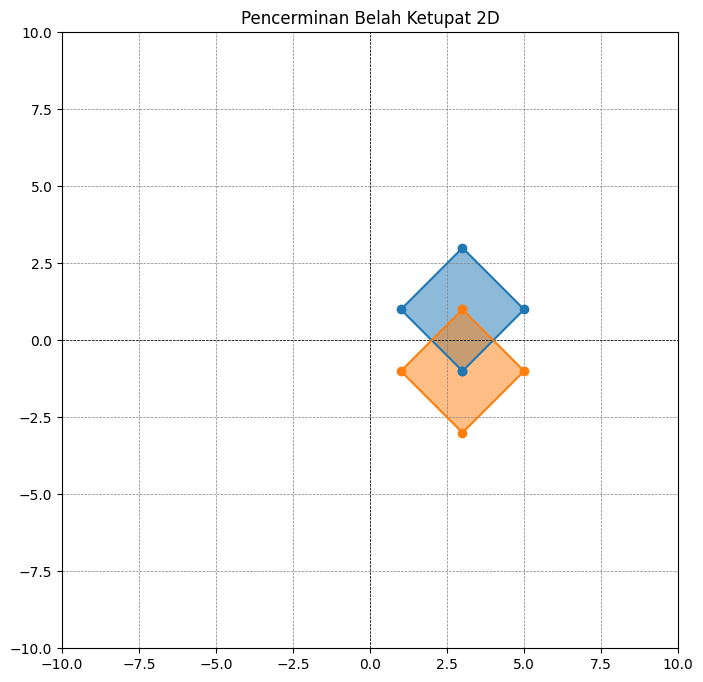

In [4]:
# Tugas

import matplotlib.pyplot as plt

def gambar_belah_ketupat(titik):
    x = [titik[0][0], titik[1][0], titik[2][0], titik[3][0], titik[0][0]]
    y = [titik[0][1], titik[1][1], titik[2][1], titik[3][1], titik[0][1]]

    plt.plot(x, y, marker='o')
    plt.fill(x, y, alpha=0.5) 

# Fungsi untuk melakukan pencerminan
def pencerminan(titik, sumbu):
    # Melakukan pencerminan berdasarkan sumbu
    if sumbu == 'x':
        # Pencerminan terhadap sumbu x
        return [[x, -y] for (x, y) in titik]
    elif sumbu == 'y':
        # Pencerminan terhadap sumbu y
        return [[-x, y] for (x, y) in titik]
    elif sumbu == 'origin':
        # Pencerminan terhadap origin
        return [[-x, -y] for (x, y) in titik]
    else:
        raise ValueError("Sumbu tidak valid. Pilih 'x', 'y', atau 'origin'.")

titik_belah_ketupat = []
print("Masukkan koordinat titik Belah Ketupat (format: x,y):")
for i in range(1, 5):
    koordinat = input(f"Titik {i}: ")
    x, y = map(float, koordinat.split(','))
    titik_belah_ketupat.append((x, y))

# Input jenis sumbu pencerminan
sumbu = input("Masukkan sumbu pencerminan ('x', 'y', atau 'origin'): ")

plt.figure(figsize=(8, 8))
plt.title('Pencerminan Belah Ketupat 2D')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

gambar_belah_ketupat(titik_belah_ketupat)
titik_belah_ketupat_pencerminan = pencerminan(titik_belah_ketupat, sumbu)
gambar_belah_ketupat(titik_belah_ketupat_pencerminan)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
# Amati hasilnya